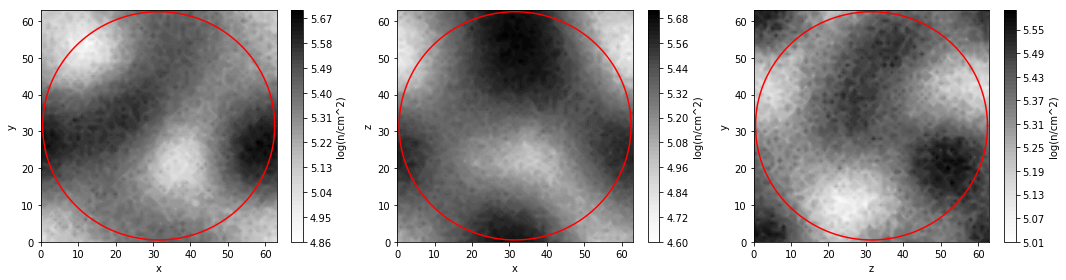

In [27]:
### CLOUD DENSITY PLOTS ###

###PLOTTING OPTIONS
color = 'Greys'
resolution = 64
###

import numpy as np
import matplotlib.pyplot as plt

#Converting cloud densities to parsec numbers
cloud = np.load('sampledensity.npy')*1e53/(3.086e18/64)**3

#Setting up 64x64 grid for cloud
x = np.arange(64)
y = np.arange(64)

X,Y = np.meshgrid(x,y)

#Summing the cloud densities of each axis
xsum = np.zeros((64,64))
ysum = np.zeros((64,64))
zsum = np.zeros((64,64))
for i in range(64):
    for j in range(64):
        xsum[i,j] = np.mean(cloud[:,i,j])
        ysum[i,j] = np.mean(cloud[j,:,i])
        zsum[i,j] = np.mean(cloud[i,j,:])

xsum = np.log10(xsum)
ysum = np.log10(ysum)
zsum = np.log10(zsum)


#Circular cloud boundary for plotting
theta = np.linspace(0,2*np.pi,1000)
xcirc = 31*np.cos(theta) + 31.5
ycirc = 31*np.sin(theta) + 31.5

#Plotting each density plane
fig = plt.figure(figsize = (15,4))

#XY plane
plt.subplot(1,3,1)
plt.contourf(X,Y,zsum,resolution,cmap=color)
cb = plt.colorbar()
cb.set_label('log(n/cm^2)')
plt.xlabel('x')
plt.ylabel('y')
plt.plot(xcirc,ycirc,'r')

#XZ plane
plt.subplot(1,3,2)
plt.contourf(X,Y,ysum,resolution,cmap=color)
cb = plt.colorbar()
cb.set_label('log(n/cm^2)')
plt.xlabel('x')
plt.ylabel('z')
plt.plot(xcirc,ycirc,'r')

#YZ plane
plt.subplot(1,3,3)
plt.contourf(X,Y,xsum,resolution,cmap=color)
cb = plt.colorbar()
cb.set_label('log(n/cm^2)')
plt.xlabel('z')
plt.ylabel('y')
plt.plot(xcirc,ycirc,'r')

plt.tight_layout()

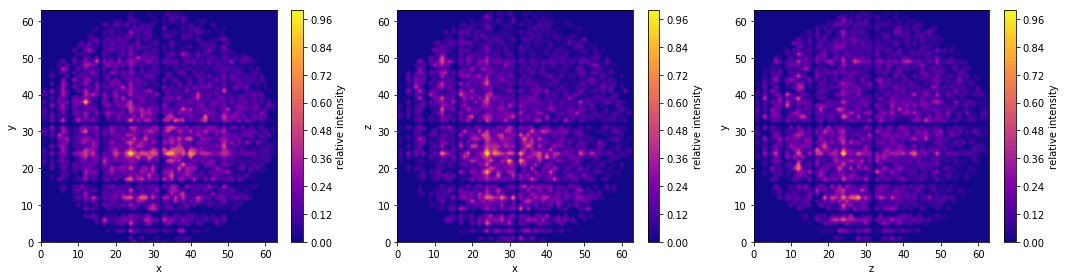

In [29]:
### FULL CLOUD PLOTTING ###

intensity = np.loadtxt('fullcloudresults.txt')
color = 'plasma'
resolution = 64

intensity *= 64/3.086e18
intarray = np.zeros((64,64,64))
points = int(len(intensity)/4)

for i in range(points):
    x = int(intensity[4*i])
    y = int(intensity[4*i+1])
    z = int(intensity[4*i+2])
    
    intarray[x,y,z] = intensity[int(4*i+3)]

#Summing the cloud intensities of each axis
xsum = np.zeros((64,64))
ysum = np.zeros((64,64))
zsum = np.zeros((64,64))
for i in range(64):
    for j in range(64):
        xsum[i,j] = np.mean(intarray[:,i,j])
        ysum[i,j] = np.mean(intarray[j,:,i])
        zsum[i,j] = np.mean(intarray[i,j,:])

xsum = xsum/np.max(xsum)
ysum = ysum/np.max(ysum)
zsum = zsum/np.max(zsum)

#Plotting each intensity plane
fig = plt.figure(figsize = (15,4))

#XY plane
plt.subplot(1,3,1)
plt.contourf(X,Y,zsum,resolution,cmap=color)
cb = plt.colorbar()
cb.set_label('relative intensity')
plt.xlabel('x')
plt.ylabel('y')

#XZ plane
plt.subplot(1,3,2)
plt.contourf(X,Y,ysum,resolution,cmap=color)
cb = plt.colorbar()
cb.set_label('relative intensity')
plt.xlabel('x')
plt.ylabel('z')

#YZ plane
plt.subplot(1,3,3)
plt.contourf(X,Y,xsum,resolution,cmap=color)
cb = plt.colorbar()
cb.set_label('relative intensity')
plt.xlabel('z')
plt.ylabel('y')

plt.tight_layout()

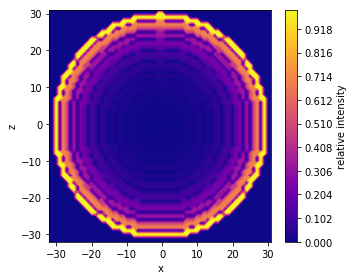

In [68]:
### UNIFORM TEST PLOTTING ###

intensity = np.loadtxt('test.txt')
color = 'plasma'

#intensity = np.random.normal(32,1,10000)

intensity *= 64/3.086e18
intarray = np.zeros((64,64))
points = int(len(intensity)/4)
thetas = np.linspace(0,2*np.pi,10000)
Rs = np.zeros(points)

for i in range(points):
    Rs[i] = int(intensity[4*i+2]-32)

for i in range(points):
    for theta in thetas:
        x = int(Rs[i]*np.cos(theta)+32)
        z = int(Rs[i]*np.sin(theta)+32)
        intarray[x,z] = intensity[int(4*i+3)]
    
intarray = intarray/np.max(intarray)

#Plotting along x,z plane
fig = plt.figure(figsize = (5,4))

plt.contourf(X,Y,intarray,resolution,cmap=color)
cb = plt.colorbar()
cb.set_label('relative intensity')
plt.xlabel('x')
plt.ylabel('z')

plt.tight_layout()

In [21]:
data = np.zeros(52*500)
for i in range(52):
    file = np.loadtxt('Aobs'+str(i)+'.txt')
    data[i*500:i*500+500] = file

np.savetxt('fullcloudresults.txt',data)